# Coincap example

Crypto Currency Arbitrage Trading Back Testing within Coincap.

This document discribed how to get data from coincap to analyze arbitrage opportunity.

## 1. get data from coincap

In [1]:
# Okex btc
# save to coincap_candles_okex_bitcoin_m1_20181031.json

import requests, time

file = open("../data/coincap_candles_m1_20181031/BTC/coincap_candles_okex_bitcoin_m1_20181031.json","w+")

url = "https://api.coincap.io/v2/candles"

start = "2018-10-31 00:00:00, 0"
end = "2018-11-1 00:00:00, 0"

startTimeArray = time.strptime(start, "%Y-%m-%d %H:%M:%S, %f")
endTimeArray = time.strptime(end, "%Y-%m-%d %H:%M:%S, %f")
startTimeStamp = int(time.mktime(startTimeArray)*1000)
endTimeStamp = int(time.mktime(endTimeArray)*1000)

querystring = {"exchange":"okex","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}

response = requests.request("GET", url, params=querystring)

file.write(response.text)

file.close

<function TextIOWrapper.close()>

In [2]:
# Binance btc
# save to coincap_candles_binance_bitcoin_m1_20181031.json

import requests, time

file = open("../data/coincap_candles_m1_20181031/BTC/coincap_candles_binance_bitcoin_m1_20181031.json","w+")

url = "https://api.coincap.io/v2/candles"

start = "2018-10-31 00:00:00, 0"
end = "2018-11-1 00:00:00, 0"

startTimeArray = time.strptime(start, "%Y-%m-%d %H:%M:%S, %f")
endTimeArray = time.strptime(end, "%Y-%m-%d %H:%M:%S, %f")
startTimeStamp = int(time.mktime(startTimeArray)*1000)
endTimeStamp = int(time.mktime(endTimeArray)*1000)

querystring = {"exchange":"binance","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}

response = requests.request("GET", url, params=querystring)

file.write(response.text)

file.close

<function TextIOWrapper.close()>

In [3]:
# Huobi btc
# save to coincap_candles_huobi_bitcoin_m1_20181031.json

import requests, time

file = open("../data/coincap_candles_m1_20181031/BTC/coincap_candles_huobi_bitcoin_m1_20181031.json","w+")

url = "https://api.coincap.io/v2/candles"

start = "2018-10-31 00:00:00, 0"
end = "2018-11-1 00:00:00, 0"

startTimeArray = time.strptime(start, "%Y-%m-%d %H:%M:%S, %f")
endTimeArray = time.strptime(end, "%Y-%m-%d %H:%M:%S, %f")
startTimeStamp = int(time.mktime(startTimeArray)*1000)
endTimeStamp = int(time.mktime(endTimeArray)*1000)

querystring = {"exchange":"huobi","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}

response = requests.request("GET", url, params=querystring)

file.write(response.text)

file.close

<function TextIOWrapper.close()>

In [4]:
# Gate.io btc
# save to coincap_candles_gate_bitcoin_m1_20181031.json

import requests, time

file = open("../data/coincap_candles_m1_20181031/BTC/coincap_candles_gate_bitcoin_m1_20181031.json","w+")

url = "https://api.coincap.io/v2/candles"

start = "2018-10-31 00:00:00, 0"
end = "2018-11-1 00:00:00, 0"

startTimeArray = time.strptime(start, "%Y-%m-%d %H:%M:%S, %f")
endTimeArray = time.strptime(end, "%Y-%m-%d %H:%M:%S, %f")
startTimeStamp = int(time.mktime(startTimeArray)*1000)
endTimeStamp = int(time.mktime(endTimeArray)*1000)

querystring = {"exchange":"gate","interval":"m1","baseId":"bitcoin","quoteId":"tether",  
               "start":startTimeStamp,"end":endTimeStamp}

response = requests.request("GET", url, params=querystring)

file.write(response.text)

file.close

<function TextIOWrapper.close()>

## 2. Analysize the arbitrage opportunity

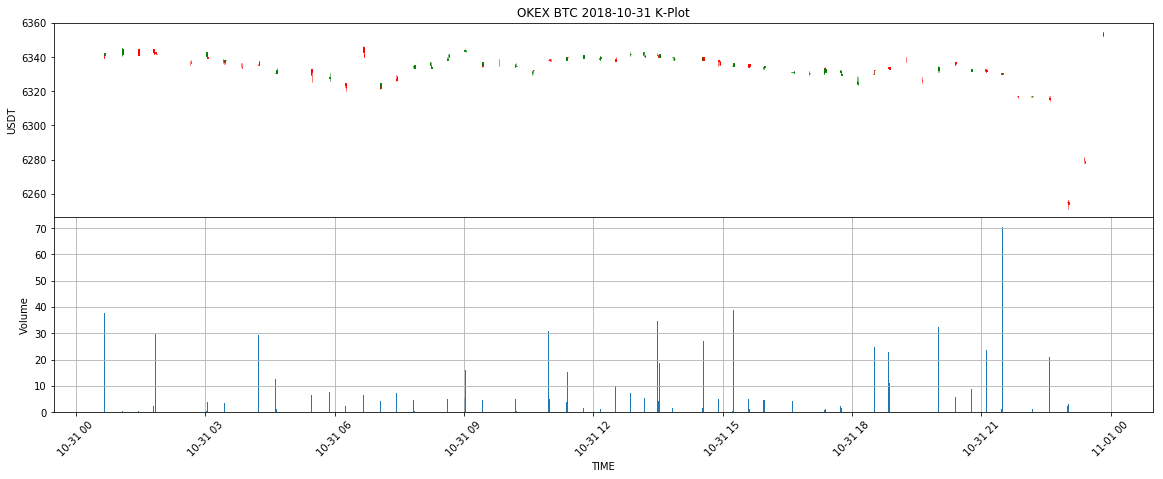

In [27]:
# Draw Okex K-Plot
import talib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import mpl_finance as mpf
import datetime
import numpy as np

%matplotlib inline

jsonFile = "../data/coincap_candles_m1_20181031/BTC/coincap_candles_okex_bitcoin_m1_20181031.json"
jsonData = pd.read_json(jsonFile,orient='values',encoding='utf-8').data

quotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))

for index in range(len(jsonData)):
    quotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(jsonData[index]['period'])/1000)),
                         'open':float(jsonData[index]['open']), 'high':float(jsonData[index]['high']), 'low':float(jsonData[index]['low']),  
                        'close':float(jsonData[index]['close']), 'volume':float(jsonData[index]['volume'])}


# 创建一个子图 
fig,(ax1,ax2)=plt.subplots(2,sharex=True,figsize=(16,6))
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
# 设置X轴刻度为日期时间
ax1.xaxis_date()
# X轴刻度文字倾斜45度
plt.xticks(rotation=45)
ax1.set_title("OKEX BTC 2018-10-31 K-Plot")
plt.xlabel("TIME")
ax1.set_ylabel("USDT")
mpf.candlestick_ohlc(ax1,np.array(quotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')
plt.grid(True)

plt.bar(quotes['period'],quotes['volume'],width=0.0005)
ax2.set_ylabel('Volume')
ax2.grid(True)

plt.show()

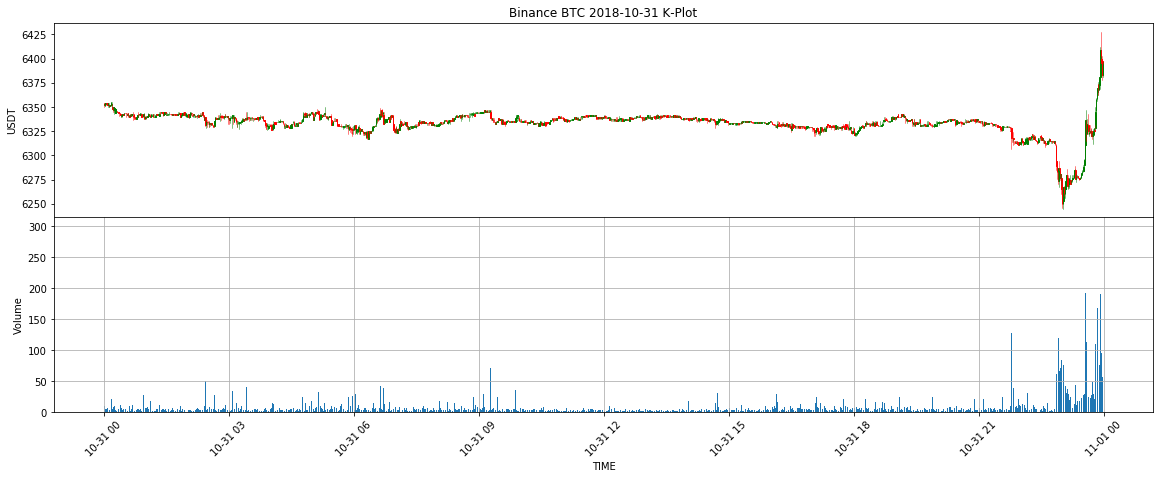

In [28]:
# Draw Binance K-Plot
import talib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import mpl_finance as mpf
import datetime
import numpy as np

%matplotlib inline

jsonFile = "../data/coincap_candles_m1_20181031/BTC/coincap_candles_binance_bitcoin_m1_20181031.json"
jsonData = pd.read_json(jsonFile,orient='values',encoding='utf-8').data

quotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))

for index in range(len(jsonData)):
    quotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(jsonData[index]['period'])/1000)),
                         'open':float(jsonData[index]['open']), 'high':float(jsonData[index]['high']), 'low':float(jsonData[index]['low']),  
                        'close':float(jsonData[index]['close']), 'volume':float(jsonData[index]['volume'])}
    
# 创建一个子图 
fig,(ax1,ax2)=plt.subplots(2,sharex=True,figsize=(16,6))
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
# 设置X轴刻度为日期时间
ax1.xaxis_date()
# X轴刻度文字倾斜45度
plt.xticks(rotation=45)
ax1.set_title("Binance BTC 2018-10-31 K-Plot")
plt.xlabel("TIME")
ax1.set_ylabel("USDT")
mpf.candlestick_ohlc(ax1,np.array(quotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')
plt.grid(True)

plt.bar(quotes['period'],quotes['volume'],width=0.0005)
ax2.set_ylabel('Volume')
ax2.grid(True)

plt.show()

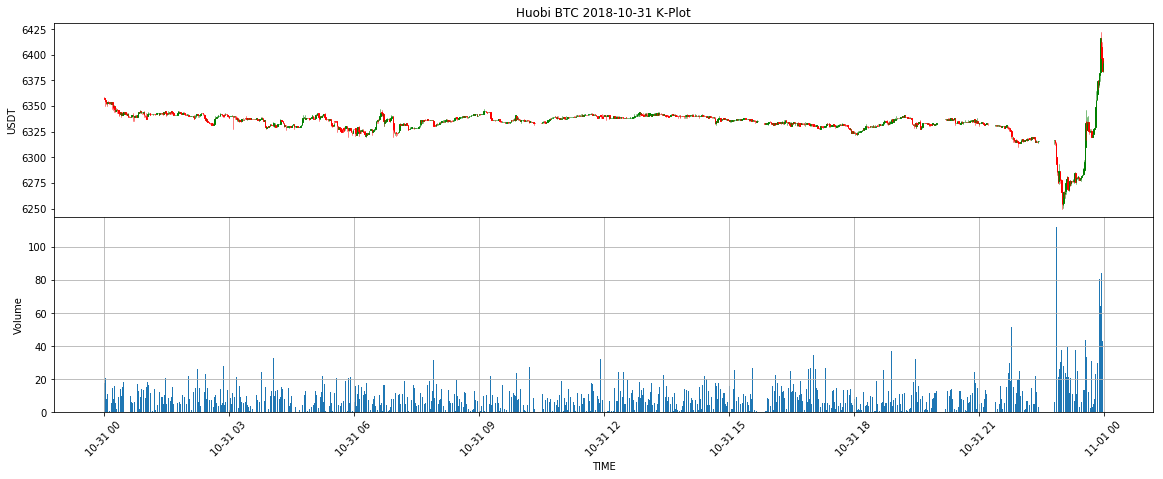

In [29]:
# Draw Huobi K-Plot
import talib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import mpl_finance as mpf
import datetime
import numpy as np

%matplotlib inline

jsonFile = "../data/coincap_candles_m1_20181031/BTC/coincap_candles_huobi_bitcoin_m1_20181031.json"
jsonData = pd.read_json(jsonFile,orient='values',encoding='utf-8').data

quotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))

for index in range(len(jsonData)):
    quotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(jsonData[index]['period'])/1000)),
                         'open':float(jsonData[index]['open']), 'high':float(jsonData[index]['high']), 'low':float(jsonData[index]['low']),  
                        'close':float(jsonData[index]['close']), 'volume':float(jsonData[index]['volume'])}
    
# 创建一个子图 
fig,(ax1,ax2)=plt.subplots(2,sharex=True,figsize=(16,6))
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
# 设置X轴刻度为日期时间
ax1.xaxis_date()
# X轴刻度文字倾斜45度
plt.xticks(rotation=45)
ax1.set_title("Huobi BTC 2018-10-31 K-Plot")
plt.xlabel("TIME")
ax1.set_ylabel("USDT")
mpf.candlestick_ohlc(ax1,np.array(quotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')
plt.grid(True)

plt.bar(quotes['period'],quotes['volume'],width=0.0005)
ax2.set_ylabel('Volume')
ax2.grid(True)

plt.show()

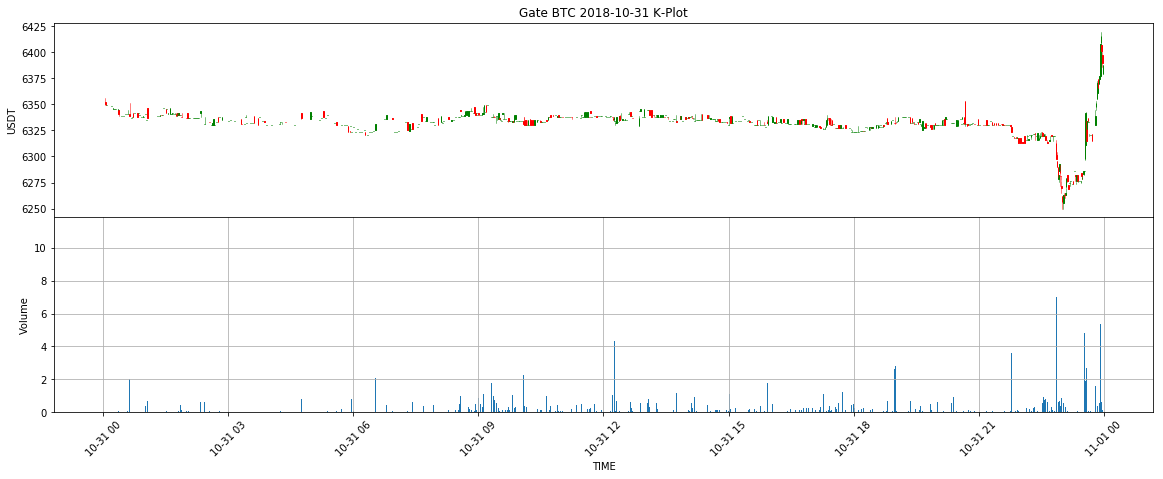

In [30]:
# Draw Gate K-Plot
import talib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import mpl_finance as mpf
import datetime
import numpy as np

%matplotlib inline

jsonFile = "../data/coincap_candles_m1_20181031/BTC/coincap_candles_gate_bitcoin_m1_20181031.json"
jsonData = pd.read_json(jsonFile,orient='values',encoding='utf-8').data

quotes = pd.DataFrame(columns=('period', 'open', 'high', 'low', 'close', 'volume'))

for index in range(len(jsonData)):
    quotes.loc[index] = {'period':dates.date2num(datetime.datetime.fromtimestamp(float(jsonData[index]['period'])/1000)),
                         'open':float(jsonData[index]['open']), 'high':float(jsonData[index]['high']), 'low':float(jsonData[index]['low']),  
                        'close':float(jsonData[index]['close']), 'volume':float(jsonData[index]['volume'])}
    
# 创建一个子图 
fig,(ax1,ax2)=plt.subplots(2,sharex=True,figsize=(16,6))
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
# 设置X轴刻度为日期时间
ax1.xaxis_date()
# X轴刻度文字倾斜45度
plt.xticks(rotation=45)
ax1.set_title("Gate BTC 2018-10-31 K-Plot")
plt.xlabel("TIME")
ax1.set_ylabel("USDT")
mpf.candlestick_ohlc(ax1,np.array(quotes.reset_index()[['period', 'open', 'high', 'low', 'close']]),  
                     width=0.0005, colorup='green', colordown='red')
plt.grid(True)

plt.bar(quotes['period'],quotes['volume'],width=0.0005)
ax2.set_ylabel('Volume')
ax2.grid(True)

plt.show()